### plot histogram of dT

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp



In [2]:
plt.rc('legend', fontsize=20) # using a size in points
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rcParams['axes.labelsize'] = 16

In [3]:
# load opsim database
dbpath_v15 = "/home/idies/workspace/lsst_cadence/FBS_1.5/"  # path to all opsim databases

dbpath_v17 = "/home/idies/workspace/lsst_cadence/FBS_1.7/"


# output directory
dataRawDir = '/home/idies/workspace/Temporary/lixl/scratch/outDir/dataRaw/'


In [4]:
# get the name of all opsim dbs 
import glob

workpath = os.getcwd()
#workpath = '/home/idies/workspace/Storage/lixl/persistent/LSST_OpSim/unknowns'

os.chdir(dbpath_v15)  # change to opsim database directory
dblist_all_v15 = glob.glob('*.db') 

os.chdir(dbpath_v17)  # change to opsim database directory
dblist_all_v17 = glob.glob('*.db') 

os.chdir(workpath) # change back to work directory
dblist_all_v15.sort()
dblist_all_v17.sort()



In [5]:
fltpairs = ['uu', 'ug', 'ur', 'ui', 'uz', 'uy', 'gg', 'gr', 'gi', 'gz', 'gy',
           'rr', 'ri', 'rz', 'ry', 'ii', 'iz', 'iy', 'zz', 'zy', 'yy' ]

fltpairs_db = ['db','uu', 'ug', 'ur', 'ui', 'uz', 'uy', 'gg', 'gr', 'gi', 'gz', 'gy',
           'rr', 'ri', 'rz', 'ry', 'ii', 'iz', 'iy', 'zz', 'zy', 'yy' ]

### tgaps distribution one filter pair

In [6]:
dblist_all_v15[5]

'baseline_v1.5_10yrs.db'

In [7]:
msname= 'WFD'

dbname = dblist_all_v15[5]

dataRaw = pd.read_pickle(dataRawDir+'/tgaps_{}_{}.pkl'.format(dbname,msname))



In [12]:
df = dataRaw[dbname]['rr']
df.head()

,pixId,Dkl,FoM_i,Nv,dT_lim
0,1376,8.412043,0.473901,2133,"[1107.9697404653343, 689.1527814895671, 1797.1..."
1,1377,7.993932,0.499844,1481,"[1120.9121385704639, 680.1152054756676, 1801.0..."
2,1378,6.976234,1.323214,1417,"[1376.282341142345, 2575.880733501952, 1199.59..."
3,1379,6.740559,2.609826,2208,"[49.85954275959375, 325.0589301454602, 275.199..."
4,1380,8.409469,0.200028,898,"[466.64562791385833, 373.8081807857525, 92.837..."


In [13]:
dT_lim = np.concatenate( df.dT_lim.values )

Text(0.5, 1.0, 'allgaps within 10yrs')

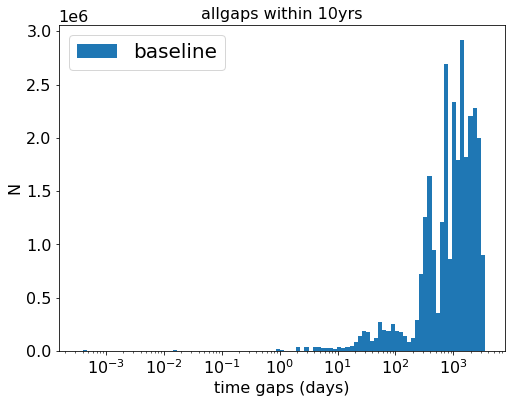

In [15]:
tmin = 30/60/60/24 # in days
#tmax = 3e8/60./60./24  
tmax = 3e8/60./60./24  
# histogram in log space
bins=np.logspace(np.log10(tmin), np.log10(tmax), 100)
 
#bins=np.linspace(tmin, tmax, 200)

plt.figure(figsize=(8,6))
plt.hist(dT_lim, bins=bins);
plt.xscale('log')
#plt.xlim([0, 5/60/60/24 ])
plt.xlabel("time gaps (days)")
plt.ylabel("N")
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.legend(["baseline"])
plt.title("allgaps within 10yrs", fontdict={"fontsize":16})

### plot

In [6]:

tmin = 5/60/60/24 # 5s in days
tmax = 3e8/60./60./24 # 10yrs in days
# histogram in log space
bins_log=np.logspace(np.log10(tmin), np.log10(tmax), 50)


#tmin = 5/60/60/24
#tmax = 1.5/24 # 1.5 hour in days
# hist bins in linspace
#bins_lin = np.linspace(tmin, tmax, 50)

tmin = 5/60 # 5s in min
tmax = 1.5 * 60 # 1.5hour in min
bins_log2=np.logspace(np.log10(tmin), np.log10(tmax), 50)


In [10]:
# prepare filter_dict

dbname = 'baseline_v1.5_10yrs.db'
msname= 'WFD'

dataRaw = pd.read_pickle(dataRawDir+'/tgaps_{}_{}.pkl'.format(dbname,msname))

fltpairs = ['uu', 'ug', 'ur', 'ui', 'uz', 'uy', 'gg', 'gr', 'gi', 'gz', 'gy',
           'rr', 'ri', 'rz', 'ry', 'ii', 'iz', 'iy', 'zz', 'zy', 'yy' ]
unit = ['day', 'min'] # units for same- and different-filter pair

unitdic = {"day": 1, "hour": 24, "min":24*60 }

filter_dict = {}
for fltpair in fltpairs:
    filter_dict[fltpair] = {}
    df = dataRaw[dbname][fltpair]
    dT = np.concatenate( df ['dT_lim'].values )
    

    if fltpair[0]==fltpair[1]:
        ## select tmin<dT<tmax
        filter_dict[fltpair]['dT'] = dT
        
        bins = bins_log
        values, bins_ = np.histogram(dT*unitdic[ unit[0] ], bins=bins);
    else:
        ## select tmin<dT<tmax
        dT = dT[dT<1.5/24]  # within 1.5h
        filter_dict[fltpair]['dT'] = dT # in days
        
        bins = bins_log2
        values, bins_ = np.histogram(dT *unitdic[ unit[1] ], bins=bins);

    Dkl = get_Dkl(values, ideal='uniform', bins=50)
    
    filter_dict[fltpair]['Dkl'] = Dkl
    print(fltpair, len(dT),  Dkl)

value sum 2468080
uu 2468080 5.398810362201651
value sum 70578
ug 70578 10.087027837354611
value sum 66368
ur 66368 9.935909402548146
value sum 9339
ui 9339 8.28940940309263
value sum 0
uz 0 nan
value sum 50
uy 50 8.221146055990351
value sum 5330741
gg 5330741 5.312331831053857
value sum 127608
gr 127608 10.311776022270775
value sum 24946
gi 24946 10.014700307192422
value sum 987
gz 987 7.3889687726673285
value sum 494
gy 494 6.708886472548894
value sum 29186938
rr 29186938 5.787795755226195
value sum 180466
ri 180466 10.405803677739307
value sum 14403
rz 14403 9.498195464109079
value sum 2043
ry 2043 7.706359109460154
value sum 29609453
ii 29609453 6.215477775914526
value sum 206627
iz 206627 10.547239883847002
value sum 38139
iy 38139 9.430703136183368
value sum 23694537
zz 23694537 6.00344538601065
value sum 174632
zy 174632 10.423314297878491
value sum 26094240
yy 26094240 5.950768567363721


In [17]:
filter_dict['ug']

{'dT': array([0.01582791, 0.01602381, 0.01587874, ..., 0.01578326, 0.01584207,
        0.01609781]),
 'Dkl': 10.087027837354611}

uu 2468080
ug 70578
ur 66368
ui 9339
uz 0
uy 50
gg 5330741
gr 127608
gi 24946
gz 987
gy 494
rr 29186938
ri 180466
rz 14403
ry 2043
ii 29609453
iz 206627
iy 38139
zz 23694537
zy 174632
yy 26094240


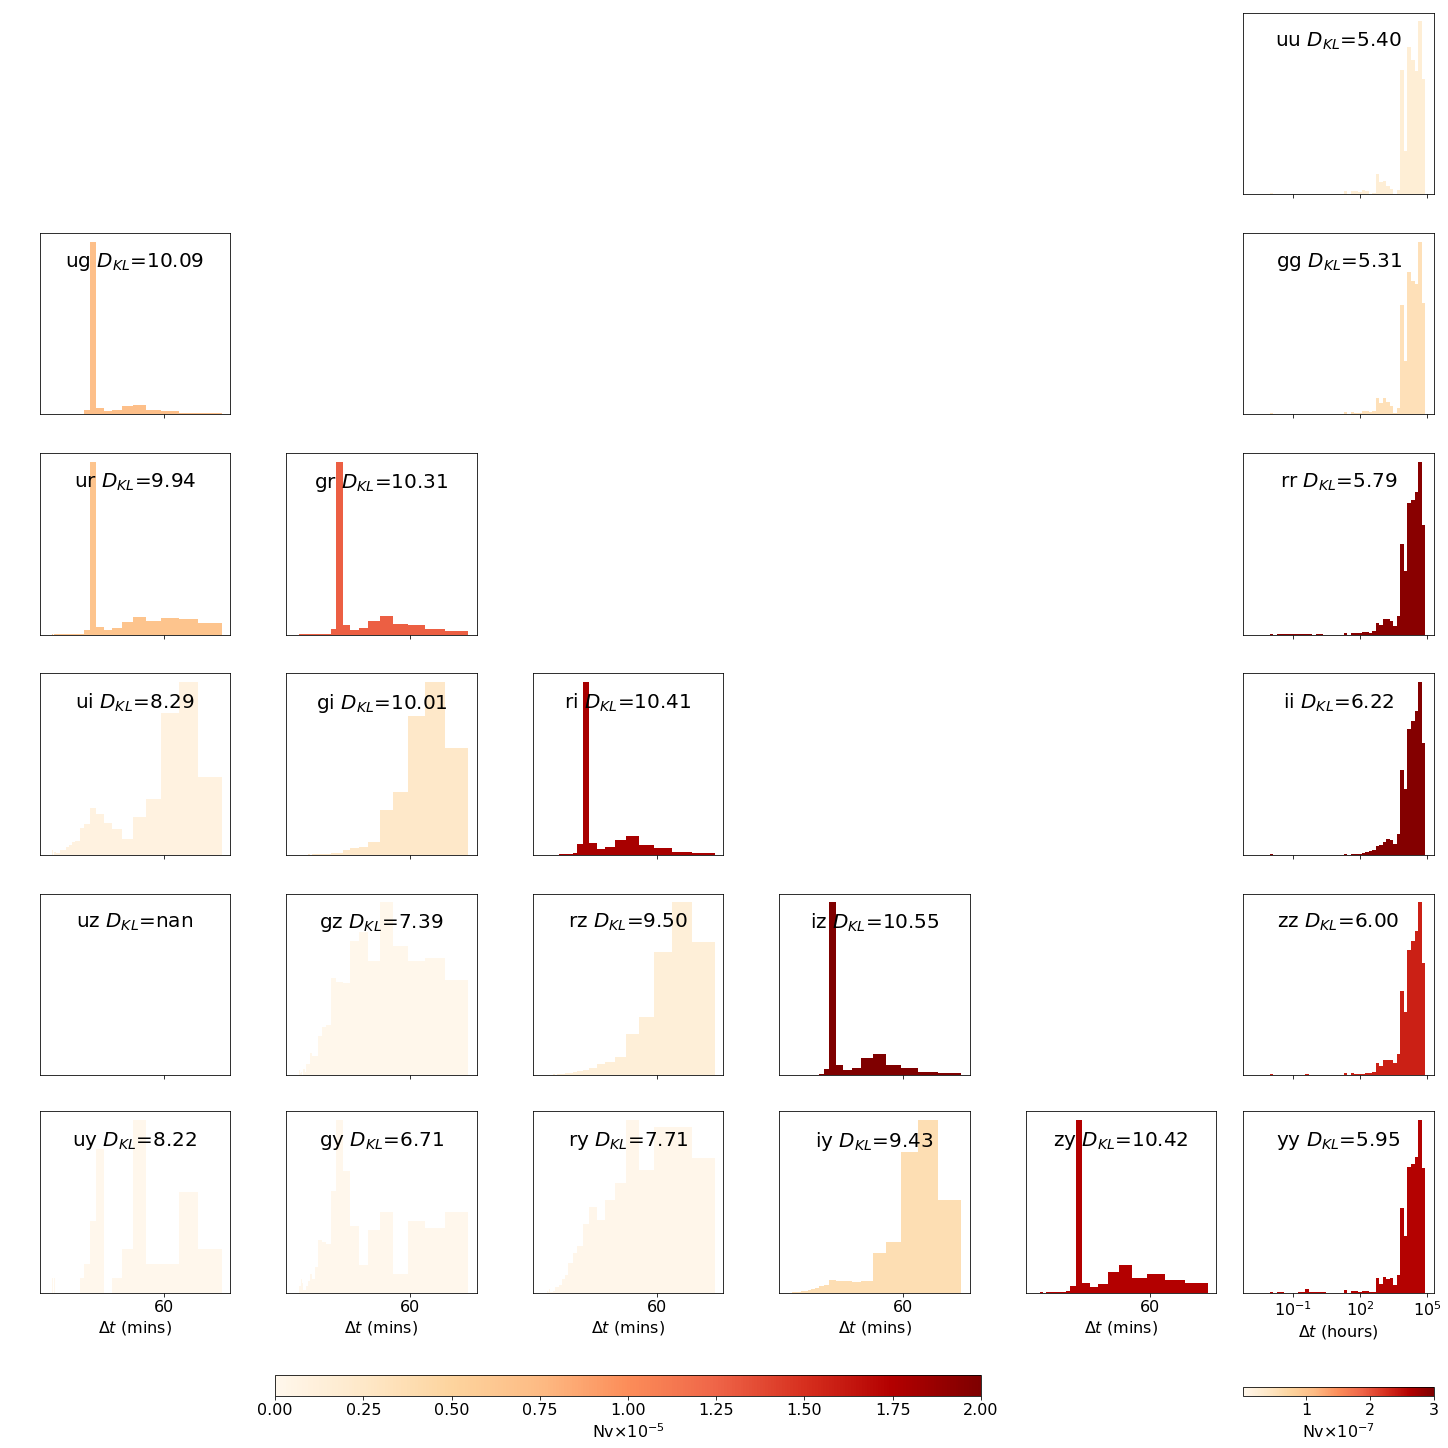

In [16]:


tmin = 5/60/60/24 # 5s in days
tmax = 3e8/60./60./24 # 10yrs in days
# histogram in log space
bins_log=np.logspace(np.log10(tmin), np.log10(tmax), 50)


#tmin = 5/60/60/24
#tmax = 1.5/24 # 1.5 hour in days
# hist bins in linspace
#bins_lin = np.linspace(tmin, tmax, 50)

tmin = 5/60 # 5s in min
tmax = 1.5 * 60 # 1.5hour 
bins_log2=np.logspace(np.log10(tmin), np.log10(tmax), 50)

fig = plot_hist_colorbar(filter_dict, figsize=(20, 20), histbins=[bins_log*24, bins_log2], xscale=['log', 'linear'], unit=['hour', 'min'],
                   cumulative=False, density=False, histtype='stepfilled')


fig.savefig("figures/tgaps_hist.pdf")


In [ ]:


tmin = 5/60/60/24 # 5s in days
tmax = 3e8/60./60./24 # 10yrs in days
# histogram in log space
bins_log=np.logspace(np.log10(tmin), np.log10(tmax), 50)


#tmin = 5/60/60/24
#tmax = 1.5/24 # 1.5 hour in days
# hist bins in linspace
#bins_lin = np.linspace(tmin, tmax, 50)

tmin = 5/60 # 5s in min
tmax = 1.5 * 60 # 1.5hour 
bins_log2=np.logspace(np.log10(tmin), np.log10(tmax), 50)

plot_hist_colorbar(filter_dict, figsize=(20, 20), histbins=[bins_log*24, bins_log2], xscale=['log', 'log'], unit=['hour', 'min'],
                   cumulative=False, density=False, histtype='stepfilled')




uu 2468080
ug 70578
ur 66368
ui 9339
uz 0
uy 50
gg 5330741
gr 127608
gi 24946
gz 987
gy 494
rr 29186938
ri 180466
rz 14403
ry 2043
ii 29609453
iz 206627
iy 38139
zz 23694537
zy 174632
yy 26094240


In [37]:
1.5 * 60

90.0

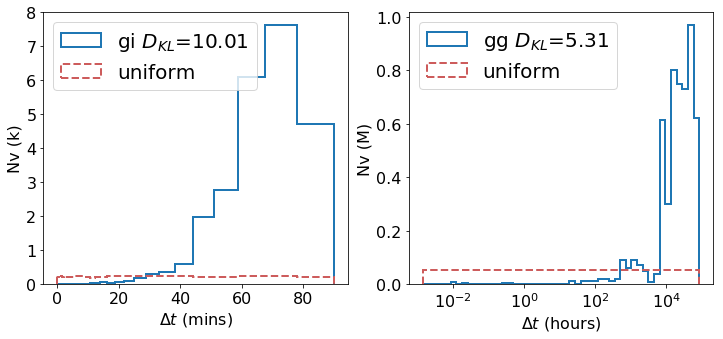

In [12]:
# plot a distribution with uniform 

key = 'gi'
dT = filter_dict[key]['dT'] * 24 * 60 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

dkltex = '$D_{KL}$'
title = '{} {}={:.2f}'.format(key, dkltex, filter_dict[key] ['Dkl'])

#uni = np.random.uniform(low=dT.min(), high=dT.max(), size=len(dT) )

#bins_lin = np.linspace(dT.min(), dT.max(), 50)


#low = np.log(dT.min())
#high = np.log(dT.max())

low = np.log(5/60) # 5s in min
high = np.log(1.5 * 60) # 1.5hour in min
uni = np.power(10, np.random.uniform(low=low, high=high, size=len(dT) ) )

#tmin = dT.min()
#tmax = dT.max()
#bins_log=np.logspace(np.log10(tmin), np.log10(tmax), 50)

tmin = 5/60 # 5s in min
tmax = 1.5 * 60 # 1.5hour in min
bins_log=np.logspace(np.log10(tmin), np.log10(tmax), 50)


ax = axs[0]
_ = ax.hist(dT, bins=bins_log, label=title, linewidth=2,
                          cumulative=False, density=False, histtype='step' );
_ = ax.hist(uni, bins=bins_log, label='uniform', alpha=1, color='indianred', linewidth=2, linestyle='--',
                          cumulative=False, density=False, histtype='step'  );
ax.legend(loc='upper left')
ax.set_xlabel('$\Delta t$ (mins)')
ax.set_ylabel('Nv (k)')
ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0), )
ax.set_xscale('linear')
ax.yaxis.get_offset_text().set_visible(False)

# --------------------------
key = 'gg'
dT = filter_dict[key]['dT'] * 24

low = np.log(dT.min())
high = np.log(dT.max())
uni = np.power(10, np.random.uniform(low=low, high=high, size=len(dT) ) )

title = '{} {}={:.2f}'.format(key, dkltex, filter_dict[key] ['Dkl'])


#tmin = dT.min()
#tmax = dT.max()
#bins_log=np.logspace(np.log10(tmin), np.log10(tmax), 50)

tmin = 5/60/60/24 # in days
tmax = 3e8/60./60./24    
# histogram in log space
bins_log=np.logspace(np.log10(tmin), np.log10(tmax), 50) * 24


ax = axs[1]
_ = ax.hist(dT, bins=bins_log, label=title, linewidth=2, 
                          cumulative=False, density=False, histtype='step' );

_ = ax.hist(uni, bins=bins_log, label='uniform', alpha=1, color='indianred', linewidth=2, linestyle='dashed',
                          cumulative=False, density=False, histtype='step'  );
ax.set_xscale('log')
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), )
ax.legend(loc='upper left')
ax.set_xlabel('$\Delta t$ (hours)')
ax.set_ylabel('Nv (M)')

ax.yaxis.get_offset_text().set_visible(False)

fig.savefig("figures/dkl_gi_log.pdf")


In [8]:
def get_Dkl(values, ideal='uniform', bins=50):
    '''kl divergence for histogram'''
    print(f"value sum {values.sum()}")
    if values.any():
        values = values + 0.00001  # make each element non-zero
        prob = (values) / values.sum()  
    
        if ideal=='uniform':
            prob_ideal = np.ones( len(prob) ) / len(prob)
        elif ideal=='lognormal':
            # create a lognormal dist
            print(f'values {values.sum()}')
            
            mode = 1/3 # mode of lognormal, at 20min
            mean = 0.8 # mean of lognormal

            mu = np.log(mode*mean) / 2
            sig = np.sqrt( np.log(mean/mode) /2 )

            logn = np.random.lognormal(mean=mu, sigma=sig, size=int(values.sum()) )
            values_, _ = np.histogram(logn, bins=bins);
            
            print(f'values_ {values_.sum()}')
            values_ = values_ + 0.00001  # make each element non-zero
            prob_ideal = (values_) / values_.sum()  
            
        return np.sum( prob_ideal * np.log(prob_ideal / prob) )
    
    else:
        return np.NaN


In [15]:
def plot_hist_colorbar(filter_dict, figsize=(20, 20), histbins=[50, 50], xscale=['log', 'lin'], unit=['day', 'min'], vmax=10000, **kwargs):
    """plot histogram
    Inputs:
        filter_dict: ['uu']['dT']
        
    """
    #fig, axs = plt.subplots(6, 6, figsize=figsize, constrained_layout=True); # 6 axes on a 2x3 grid
    fig, axs = plt.subplots(6, 6, figsize=figsize, constrained_layout=True);
    flt = ['u', 'g', 'r', 'i', 'z', 'y']
    fdict = {'u':0, 'g':1, 'r':2, 'i':3, 'z':4, 'y':5}
    unitdic = {"day": 1, "hour": 24, "min":24*60 }

    cmap = matplotlib.cm.OrRd
    for i, f0 in enumerate(flt):
        for f1 in flt[i:]:
            key = '{}{}'.format(f0, f1)
            dT = filter_dict[key] ['dT']
            #eDkl = filter_dict[key] ['eDkl']
            
            #title = '{}{} Nv={} $D_k$={:.2f}'.format(f0, f1, len(dT), filter_dict[key] ['Dkl'])                   
            dkltex = '$D_{KL}$'
            title = '{} {}={:.2f}'.format(key, dkltex, filter_dict[key] ['Dkl'])

            if f0==f1:
                vmin1 = 100000
                vmax1 = 30000000
                norm = matplotlib.colors.Normalize(vmin=vmin1, vmax=vmax1)
                m1 = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
                
                ax = axs[fdict[f0], 5]
                axs[fdict[f0], fdict[f1]].axis('off')
                # plot distribution
                Nv = len(dT)
                if Nv!=0:
                    values, bins, _ = ax.hist(dT*unitdic[ unit[0] ], bins=histbins[0], color=m1.to_rgba(Nv), label=title, **kwargs );
                    ax.legend(loc='upper center', handlelength=0, handletextpad=0, frameon=False)
                ax.set_xscale( xscale[0] )
                
            else:
                axs[fdict[f0], fdict[f1]].axis('off')
                ax = axs[fdict[f1], fdict[f0]]
                
                vmin2 = 0
                vmax2 = 200000
                norm = matplotlib.colors.Normalize(vmin=vmin2, vmax=vmax2)
                m2 = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

                # plot distribution
                Nv = len(dT)
                #if Nv!=0:
                values, bins, _ = ax.hist(dT*unitdic[ unit[1] ], bins=histbins[1], color=m2.to_rgba(Nv), label=title, **kwargs );
                ax.legend(loc='upper center', handlelength=0, handletextpad=0, frameon=False)
                ax.set_xscale( xscale[1] )
                ax.set_xticks([60])
                
            
            # ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

            # ax.set_title(title)
            
            if fdict[f1]!=5:
                ax.get_xaxis().set_ticklabels([])
                
            ax.get_yaxis().set_ticks([])
            #ax.set_ylabel('N fields')
            print(key, Nv)
    for i in range(6):
        #axs[i, i].axis('off')
        axs[i, 5].axis('on')    
        
        if i==5:
            axs[5, i].set_xlabel(f'$\Delta t$ ({unit[0]}s)')
        else:
            axs[5, i].set_xlabel(f'$\Delta t$ ({unit[1]}s)')
    
    # cbar diagonal
    m1.set_array(np.linspace(vmin1, vmax1) ) 
    cbar1 = fig.colorbar(mappable=m1, ax=axs[:,5], shrink=1, location='bottom')
    cbar1.set_label(r'Nv$\times 10^{-7}$')
    cbar1.ax.xaxis.get_offset_text().set_visible(False)


    #cbar1.formatter.set_powerlimits((0, 0))
    #cbar1.update_ticks()
    
    # for off diagonal
    m2.set_array(np.linspace(vmin2, vmax2) ) 
    cbar2 = fig.colorbar(mappable=m2, ax=axs[:,:5], shrink=.6, location='bottom')
    cbar2.set_label(r'Nv$\times 10^{-5}$')
    cbar2.set_clim([0, vmax2])

    cbar2.formatter.set_powerlimits((0, 0))
    cbar2.update_ticks()
    cbar2.ax.xaxis.get_offset_text().set_visible(False)
    
    #fig.suptitle(dbfile, fontsize=16)
    #fig.savefig('{}.png'.format(filename), dpi=200)
    #fig.tight_layout( pad=1.0 )
    return fig


